In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
#Image links
reesesLink="Computer-Vision-with-Python/DATA/reeses_puffs.png"
cerealLink="Computer-Vision-with-Python/DATA/many_cereals.jpg"

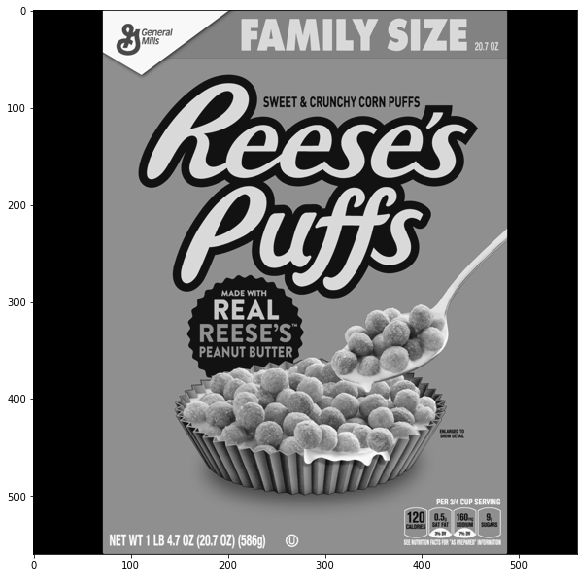

In [32]:
reeses=cv2.imread(reesesLink,0)
display(reeses)

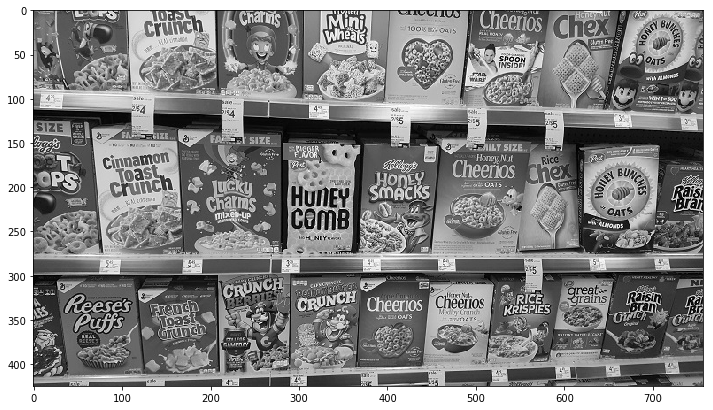

In [33]:
cereals=cv2.imread(cerealLink,0)
display(cereals)

# Brute-Force with ORB Descriptors

In [6]:
orb=cv2.ORB_create()

In [7]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [8]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [9]:
matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)

In [10]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[0:25],None,flags=2)

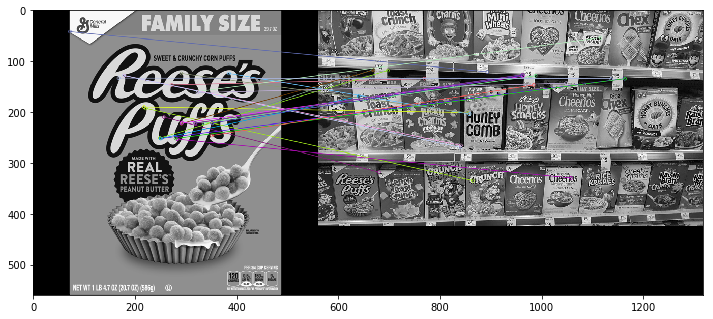

In [11]:
display(reeses_matches)

# Brute-Force with SIFT Descriptors

In [20]:
sift=cv2.xfeatures2d.SIFT_create()

In [21]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [22]:
bf=cv2.BFMatcher()

In [23]:
matches=bf.knnMatch(des1,des2,k=2)

In [24]:
len(matches)

1500

In [25]:
good_matches=[]

for match1,match2 in matches:
    if match1.distance<0.75*match2.distance:
        good_matches.append([match1])

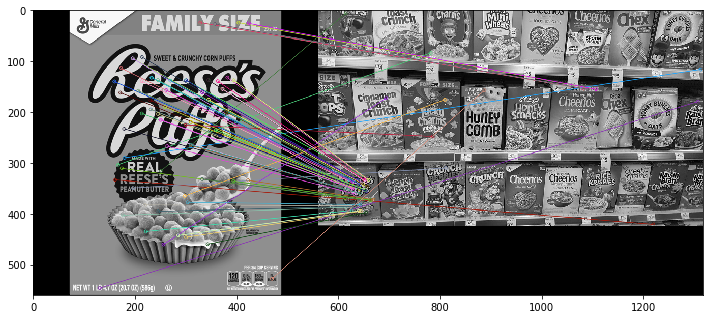

In [31]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good_matches,None,flags=2)
display(sift_matches)

# FLANN Based Matching

In [34]:
sift=cv2.xfeatures2d.SIFT_create()

In [35]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [36]:
#FLANN PARAMS
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

In [37]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [38]:
matches=flann.knnMatch(des1,des2,k=2)

In [41]:
matches_mask=[[0,0] for i in range(len(matches))]
matches_mask[:5]

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

In [42]:
a=[50,40,30,20]

In [43]:
enumerate(a)

In [46]:
for i,(x) in enumerate(a):
    print(f'{i}   {x}')

0   50
1   40
2   30
3   20


In [47]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance<0.7*match2.distance:
        matches_mask[i]=[1,0]

In [48]:
draw_params=dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matches_mask,flags=0)

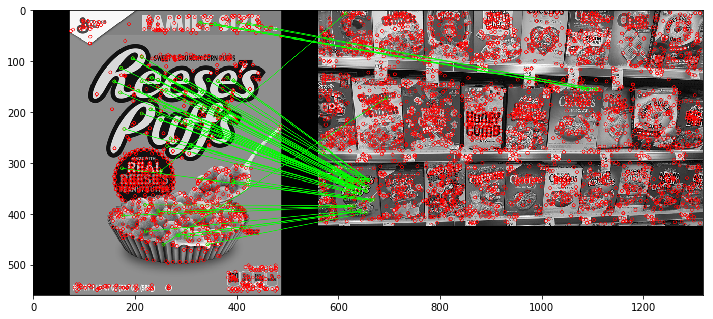

In [50]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)